# Online Shoppers Intention Dataset Analysis

## Introduction

This project analyzes the **Online Shoppers Intention Dataset**, which focuses on user sessions and their impact on revenue generation. The dataset is provided in ARFF format and converted to CSV for easier handling. It includes information like the number of page visits, time spent, user type, and session details.

The analysis steps include:

1. Loading and preparing the dataset.
2. Performing Exploratory Data Analysis (EDA) to find patterns and trends.
3. Encoding and scaling the data for machine learning models.
4. Training models like Logistic Regression, Random Forest, Gradient Boosting, and SVM to predict revenue.
5. Comparing model performances and identifying key factors influencing revenue.

This workflow helps in understanding user behavior and improving online business decisions.


## 1. Loading the Online Shoppers Dataset
### Dataset Source

The dataset used in this analysis is downloaded from **OpenML**, a popular platform for sharing datasets and machine learning experiments. 

- **File Format**: The dataset is provided in ARFF (Attribute-Relation File Format), which is commonly used for machine learning datasets.
- **Dataset Description**: This dataset contains information about online shopper sessions and their behavior, focusing on factors influencing revenue generation.
- **Source URL**: [OpenML Online Shoppers Intention Dataset](https://www.openml.org/search?type=data&status=active&id=45560&sort=runs)


### What is ARFF?

ARFF (Attribute-Relation File Format) is a simple file format used to describe instances sharing a set of attributes.


ARFF files are structured with:
1. **Header Section**: Defines the attributes (columns) in the dataset.
2. **Data Section**: Contains the actual data instances (rows).

In this analysis, we are loading an ARFF file and converting it into a pandas DataFrame and the dataset is converted into a CSV file, which is a more common format for data analysis in Python.


In [1]:
# Importing necessary libraries
import pandas as pd
from scipy.io import arff

# Define the file path for the ARFF file
file_path = r"C:\Users\Owner\OneDrive - University of Leicester\Desktop\Final\Supraja\dataset_"

# Load the ARFF file
data, meta = arff.loadarff(file_path)

# Convert to a pandas DataFrame
df = pd.DataFrame(data)

# Decode byte strings to regular strings
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Displaying the first few rows of the dataset to understand its structure
df.head()


D:\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\Owner\AppData\Local\Temp\ipykernel_32028\397980299.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## 1.1 Saving the Dataset as a CSV File

For ease of analysis in Python and other tools, the dataset has been saved as a CSV file. 

In [2]:
# Saving the DataFrame to a CSV file for easy future analysis
csv_file_path = r"C:\Users\Owner\OneDrive - University of Leicester\Desktop\Final\Supraja\online_shoppers_intention.csv"
df.to_csv(csv_file_path, index=False)

## 1.2  Importing Libraries and Dataset

In [3]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset
data = pd.read_csv(r"C:\Users\Owner\OneDrive - University of Leicester\Desktop\Final\Supraja\online_shoppers_intention.csv")


In [4]:
# Displaying first few rows
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## 1.3 Dataset Information

The dataset contains information about online shopper sessions, including features that represent user behavior and engagement on an e-commerce website. Key attributes include:

- **Administrative**: Number of administrative pages visited.
- **Administrative_Duration**: Total time spent on administrative pages.
- **Informational**: Number of informational pages visited.
- **Informational_Duration**: Total time spent on informational pages.
- **ProductRelated**: Number of product-related pages visited.
- **ProductRelated_Duration**: Total time spent on product-related pages.
- **BounceRates**: The proportion of visitors who leave the site after viewing only one page.
- **ExitRates**: The proportion of visitors who leave the site from a specific page.
- **PageValues**: Average value of pages visited by users before conversion.
- **SpecialDay**: Closeness of the visit date to a special day (e.g., holidays).
- **Month**: Month of the visit (e.g., January, February).
- **OperatingSystems**: User's operating system (represented numerically).
- **Browser**: User's browser (represented numerically).
- **Region**: User's region (represented numerically).
- **TrafficType**: Source of user traffic (e.g., direct, referral).
- **VisitorType**: Type of visitor (e.g., returning, new).
- **Weekend**: Indicates whether the session occurred during the weekend.
- **Revenue**: Target variable indicating whether the session resulted in a conversion (revenue).

This dataset is suitable for analysis tasks such as identifying trends, patterns, and factors influencing revenue generation and user behavior on the website.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  float64
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# 2. Exploratory Data Analysis (EDA)

Now we will perform an Exploratory Data Analysis (EDA) on the "Online Shoppers Intention" dataset. It includes univariate, bivariate, multivariate and Timeseries analyses to derive meaningful insights for business decision-making.


## 2.1 Data Preparation

In [7]:
# Define the order of months for consistent plotting
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Converting 'Month' to datetime format
months_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6, 
                  'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
data['Month_Num'] = data['Month'].map(months_mapping)

# Creating a full date format for the 'Month' (assuming the year 2019 for analysis)
data['Month_Date'] = pd.to_datetime(data['Month_Num'], format='%m')

# Displaying the first few rows of the prepared data
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Month_Num,Month_Date
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,2,1900-02-01
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,2,1900-02-01
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,2,1900-02-01
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,2,1900-02-01
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,2,1900-02-01


## 2.2 Univariate Analysis
This section analyzes the distribution of individual variables to understand their patterns and detect any anomalies.


### 2.2.1. Distribution of Categorical Variables

### 2.2.1.1 Revenue Analysis

In [8]:
# checking the distribution of revenue

data['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

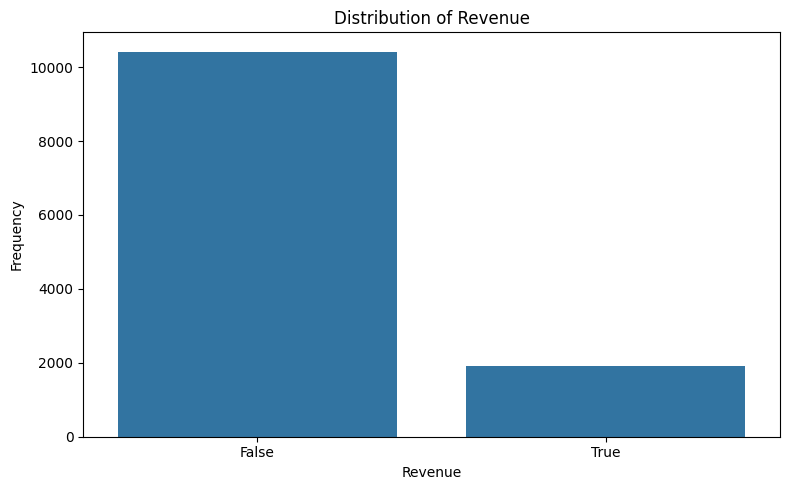

In [9]:
# Plotting the Distribution of 'Revenue'
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Revenue')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Observation 
The dataset shows, with more sessions not leading to revenue.

### 2.2.1.2 VisitorType Analysis

In [10]:
# checking the distribution of VisitorType

data['VisitorType'].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

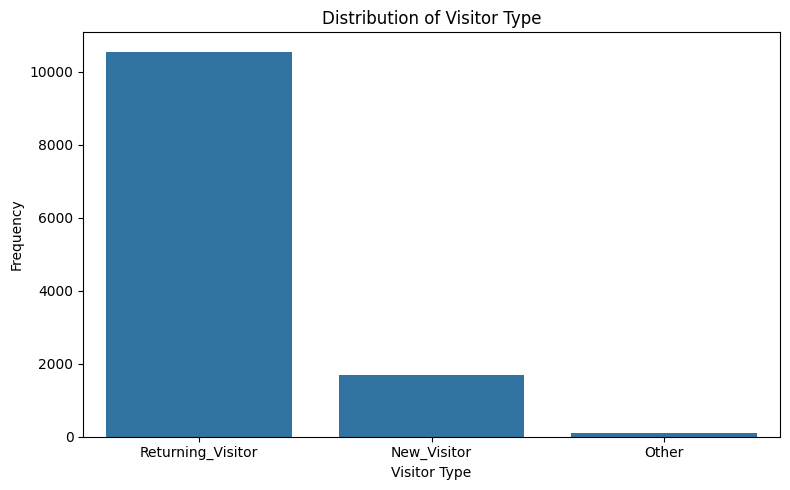

In [11]:
# Plotting the Distribution of 'VisitorType'
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='VisitorType')
plt.title('Distribution of Visitor Type')
plt.xlabel('Visitor Type')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


#### Observation 
Most sessions come from returning visitors, indicating strong repeat engagement.

### 2.2.1.3 Weekend Analysis

In [12]:
# checking the distribution of Weekend

data['Weekend'].value_counts()

Weekend
False    9462
True     2868
Name: count, dtype: int64

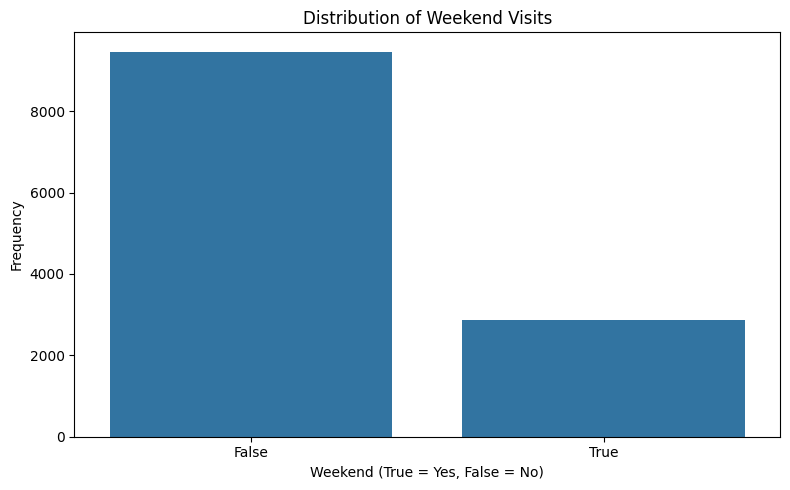

In [13]:
# Plotting the Distribution of 'Weekend'
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Weekend')
plt.title('Distribution of Weekend Visits')
plt.xlabel('Weekend (True = Yes, False = No)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


#### Observation 
Weekend sessions are more frequent compared to weekday sessions.

### 2.2.1.4 Month Analysis

In [14]:
# checking the months with most no.of customers visiting the online shopping sites.

data['Month'].value_counts()

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

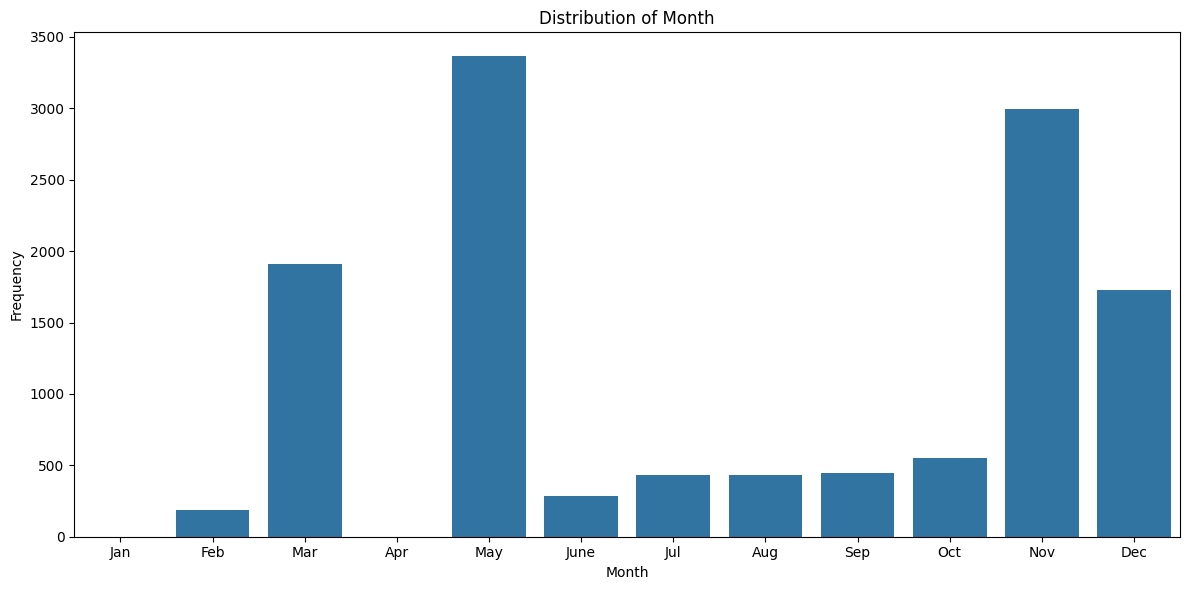

In [15]:
# Plotting the Distribution of 'Month'
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Month', order=months_order)
plt.title('Distribution of Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Observation 
Most sessions occur in November, followed by May, March, and February.

### 2.2.1.5 Region Analysis

In [16]:
# checking the distribution of Region

data['Region'].value_counts()

Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: count, dtype: int64

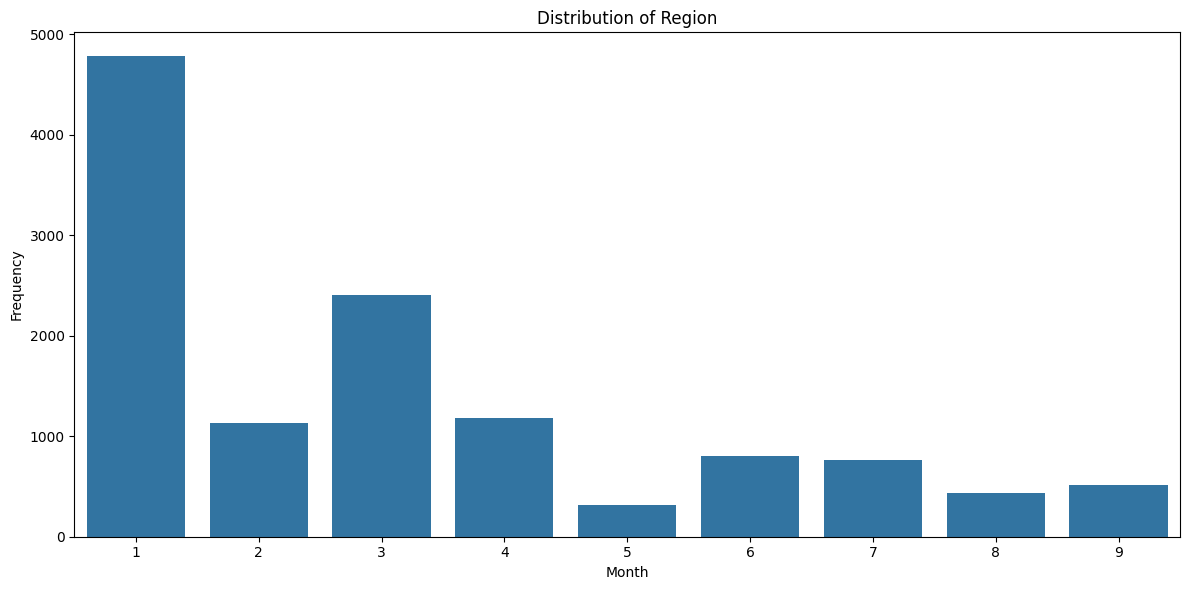

In [17]:
# Plotting the Distribution of 'Region'
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Region')
plt.title('Distribution of Region')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Observation
Region 1 has the highest number of sessions, followed by Region 3, while other regions have significantly lower activity.


### 2.2.2 Distribution of Numerical Variables

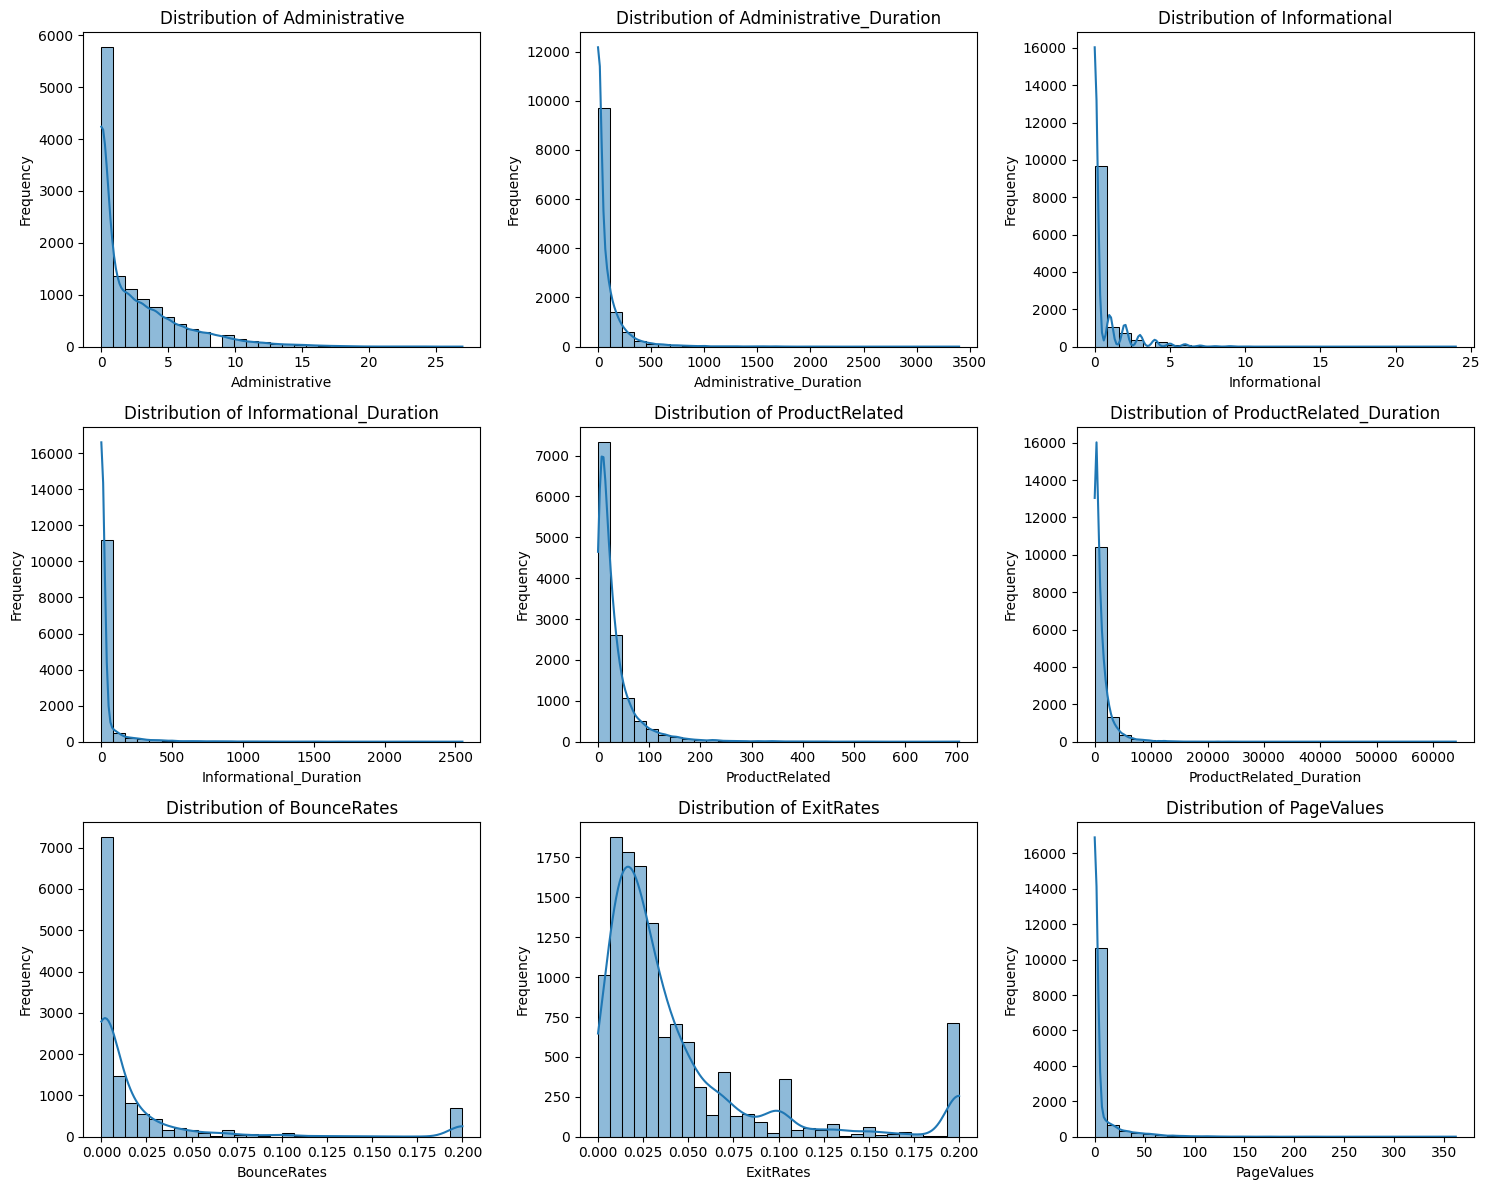

In [18]:
# Numerical features to analyze
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational',
                      'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                      'BounceRates', 'ExitRates', 'PageValues']

# Create a figure with subplots (3 rows and 3 columns for 9 features)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3 rows, 3 columns

# Loop through each feature and plot its histogram
for i, feature in enumerate(numerical_features):
    # Calculate the row and column index for each subplot
    row = i // 3  # Integer division to get the row index (0, 1, or 2)
    col = i % 3   # Modulo to get the column index (0, 1, or 2)
    
    # Plot the histogram with KDE on the correct subplot
    sns.histplot(data=data, x=feature, kde=True, bins=30, ax=axes[row, col])
    
    # Set title and labels for each subplot
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

# Adjust layout so the subplots fit without overlapping
plt.tight_layout()

# Display the plots
plt.show()


#### Observations for Numerical Features

1. **Administrative**: Most sessions involve minimal visits to administrative pages.
2. **Administrative_Duration**: Very little time is spent on administrative pages in most sessions.
3. **Informational**: Most sessions include no visits to informational pages.
4. **Informational_Duration**: Sessions rarely involve significant time spent on informational pages.
5. **ProductRelated**: Product-related pages have high engagement, with some sessions showing extensive browsing.
6. **ProductRelated_Duration**: Longer durations are rare, with most sessions having lower engagement time.
7. **BounceRates**:Skewed towards lower values, indicating good engagement.
8. **ExitRates**: Higher frequency towards lower values, similar to bounce rates.
9. **PageValues**: Most page values are low, with a few high-value pages.
.


### 2.2.3 SpecialDay Analysis

In [19]:
# checking the distribution of SpecialDay

data['SpecialDay'].value_counts()

SpecialDay
0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: count, dtype: int64

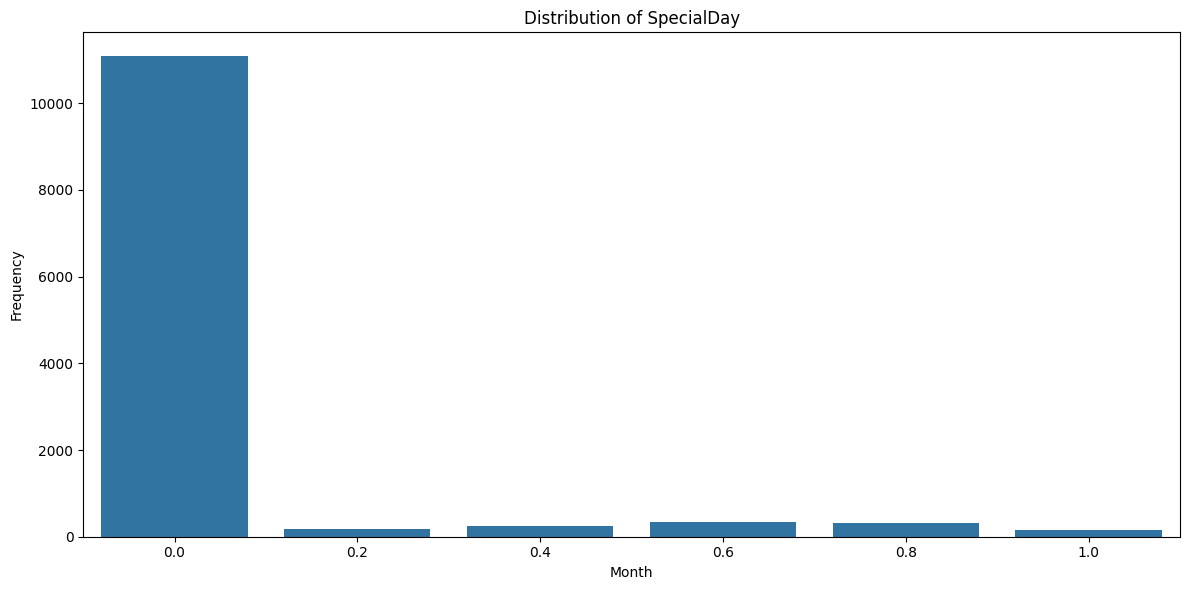

In [20]:
# Plotting the Distribution of 'SpecialDay'
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='SpecialDay')
plt.title('Distribution of SpecialDay')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Observations 

- The **"Special Day" feature** represents the proximity of site visits to specific special days (e.g., Valentine's Day or Mother's Day), where users are more likely to complete transactions.
- Most sessions have a **special day value of 0**, indicating that the majority of visits occur far from any special day.
- A small number of sessions have **non-zero values**, representing visits close to special days. Among these, there are very few instances where the "Special Day" value approaches its maximum of 1.
- This highlights that special days are rare but could have a **significant impact on user behavior and transaction likelihood**, as indicated by their increased closeness values.




### Outlier Detection

In [21]:
# List of numerical features to check for outliers
numerical_features = [
    'Administrative', 'Administrative_Duration', 'Informational', 
    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
]

In [22]:
# Loop through each numerical feature to calculate IQR and detect outliers
outliers = {}

for feature in numerical_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Detecting outliers
    outlier_data = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    
    # Storing the number of outliers for each feature
    outliers[feature] = len(outlier_data)

# Output the number of outliers detected for each feature
outliers

{'Administrative': 404,
 'Administrative_Duration': 1172,
 'Informational': 2631,
 'Informational_Duration': 2405,
 'ProductRelated': 987,
 'ProductRelated_Duration': 961,
 'BounceRates': 1551,
 'ExitRates': 1099,
 'PageValues': 2730,
 'SpecialDay': 1251}

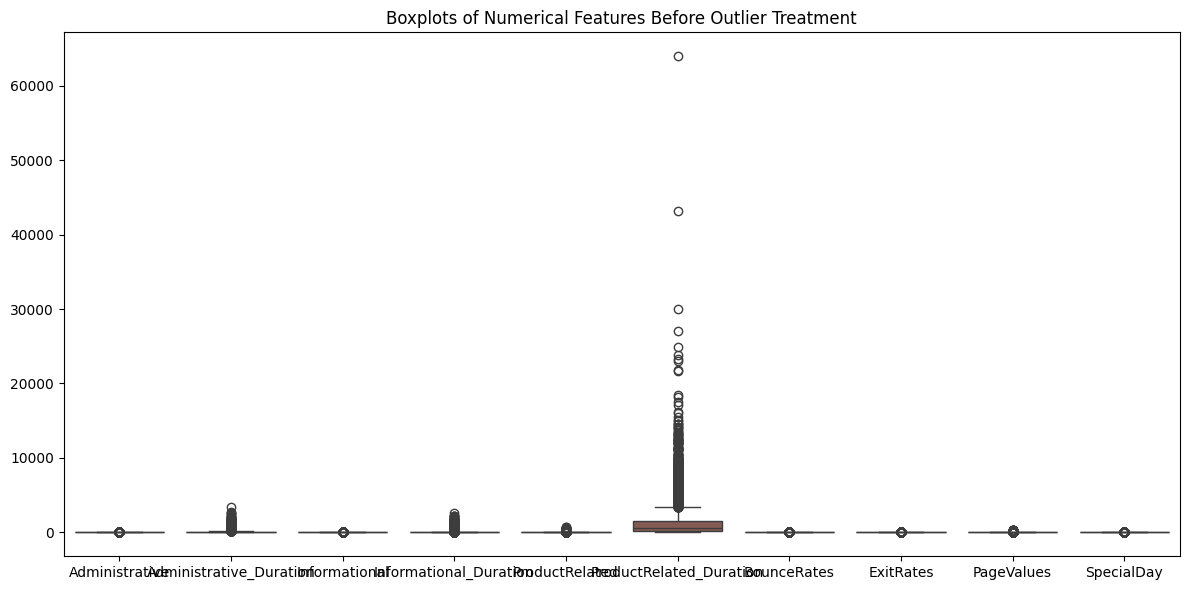

In [23]:
# Plotting before treatment
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_features])
plt.title("Boxplots of Numerical Features Before Outlier Treatment")
plt.tight_layout()
plt.show()


### Outlier Treatment Decision

After reviewing the outlier detection results and considering the following factors:

- The dataset contains a substantial number of rows (12,330), which reduces the impact of outliers on the overall analysis.
- We are using machine learning models, particularly **tree-based models**, which are robust to outliers and are less affected by extreme values.
- The outliers might represent **valid, extreme observations** (e.g., special days, high-value transactions) that could provide valuable insights for business analysis.

It has been determined that **treating the outliers is not necessary** in this case, as they are unlikely to significantly affect the model's performance or the accuracy of the results. Therefore, we will proceed without applying any treatment for the outliers.


## 2.3 Bivariate Analysis
This section explores relationships between two variables, particularly focusing on their impact on revenue.


### 2.3.1. Revenue vs. Key Features

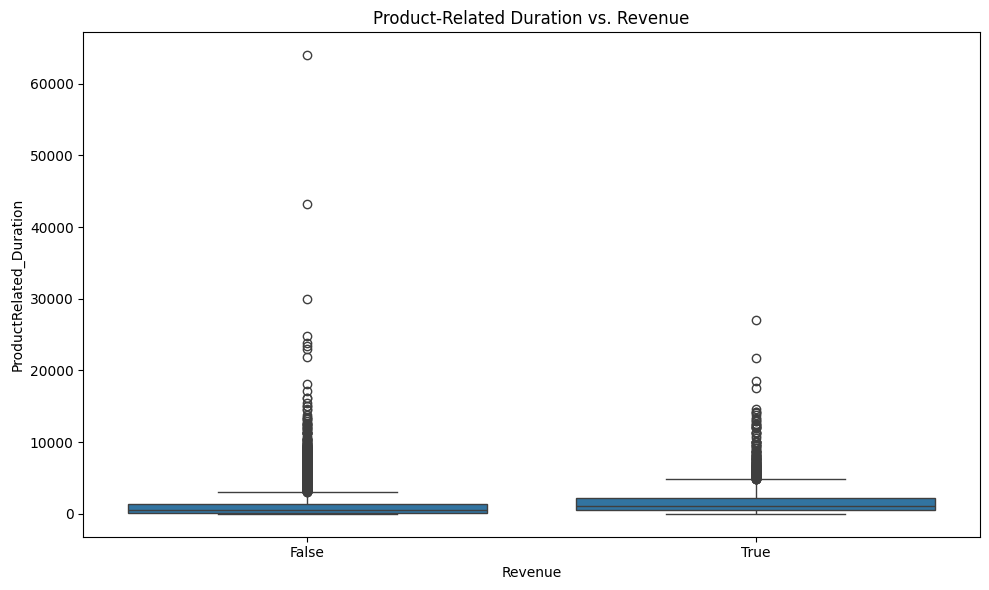

In [24]:
# Revenue vs. 'ProductRelated_Duration'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Revenue', y='ProductRelated_Duration')
plt.title('Product-Related Duration vs. Revenue')
plt.tight_layout()
plt.show()

### Observation

- Sessions with **higher product-related duration** are more likely to result in revenue (`True`), although the median duration remains relatively low for both categories.
- There are significant outliers with very high product-related durations, but these are observed in both revenue and non-revenue sessions.
- **Insight**: Increasing engagement on product-related pages may positively impact revenue generation.


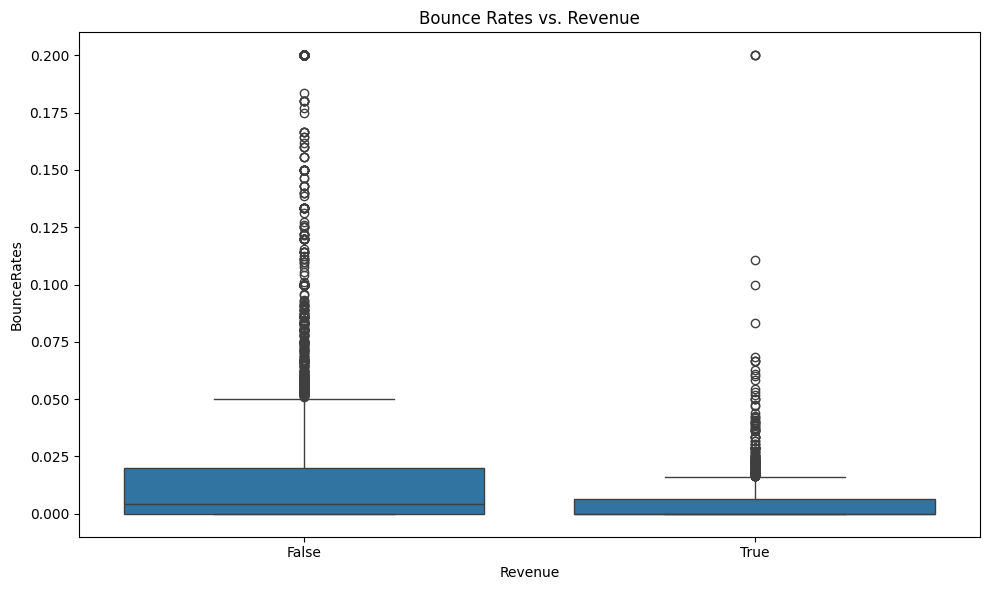

In [25]:
# Revenue vs. 'BounceRates'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Revenue', y='BounceRates')
plt.title('Bounce Rates vs. Revenue')
plt.tight_layout()
plt.show()

### Observation

- **Lower bounce rates** are strongly associated with revenue-generating sessions (`True`).
- Sessions with **higher bounce rates** are more likely to not generate revenue (`False`), as evidenced by the higher median and range in non-revenue sessions.
- **Insight**: Reducing bounce rates can improve the likelihood of revenue generation.


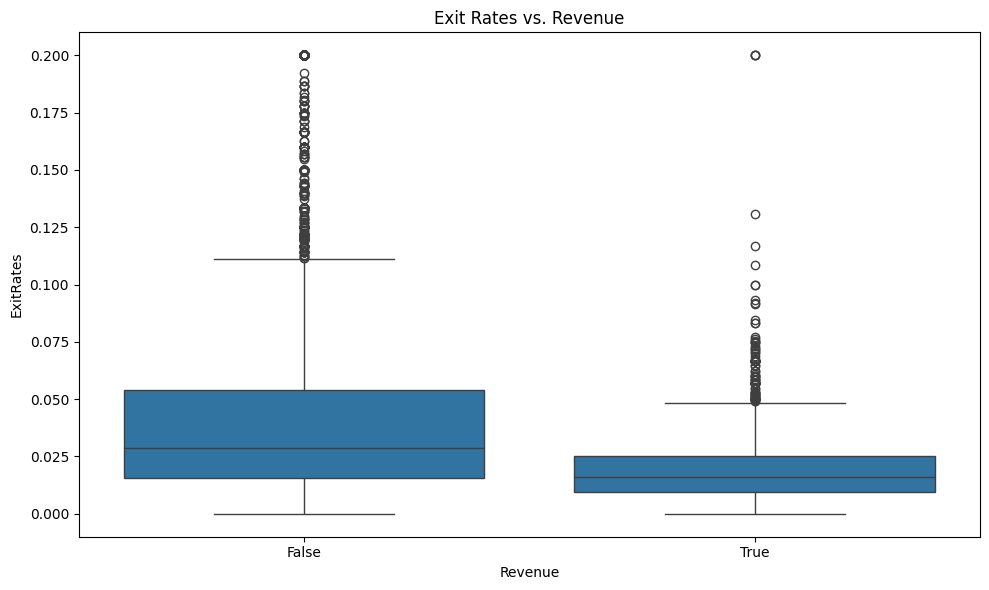

In [26]:
# Revenue vs. 'ExitRates'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Revenue', y='ExitRates')
plt.title('Exit Rates vs. Revenue')
plt.tight_layout()
plt.show()

### Observation

- **Lower exit rates** are associated with revenue-generating sessions (`True`), as shown by the lower median for revenue sessions.
- Sessions with **higher exit rates** are more likely to not generate revenue (`False`), indicated by the wider range and higher median for non-revenue sessions.
- **Insight**: Reducing exit rates, potentially by improving user navigation or engagement, can positively impact revenue generation.


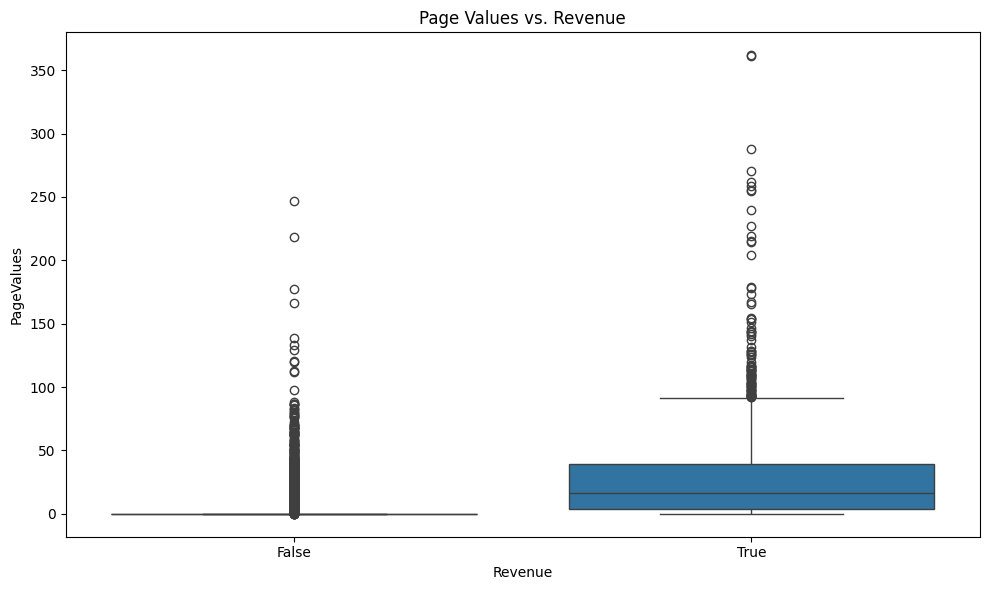

In [27]:
# Revenue vs. 'PageValues'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Revenue', y='PageValues')
plt.title('Page Values vs. Revenue')
plt.tight_layout()
plt.show()


### Observation

- Sessions with **higher page values** are strongly associated with revenue generation (`True`), as indicated by a significantly higher median and interquartile range for revenue sessions.
- Non-revenue sessions (`False`) have almost zero page values for most instances, indicating minimal engagement with valuable pages.
- **Insight**: Increasing page value through targeted recommendations or promotions can significantly improve revenue generation.


### 2.3.2. Categorical vs. Revenue

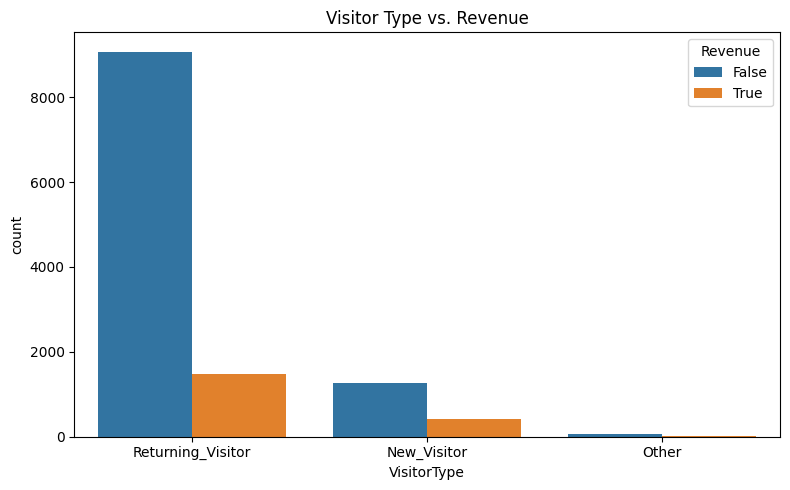

In [28]:
# Revenue vs. 'VisitorType'
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='VisitorType', hue='Revenue')
plt.title('Visitor Type vs. Revenue')
plt.tight_layout()
plt.show()

### Observation

- **Returning visitors** contribute significantly more to revenue generation compared to new visitors or other types.


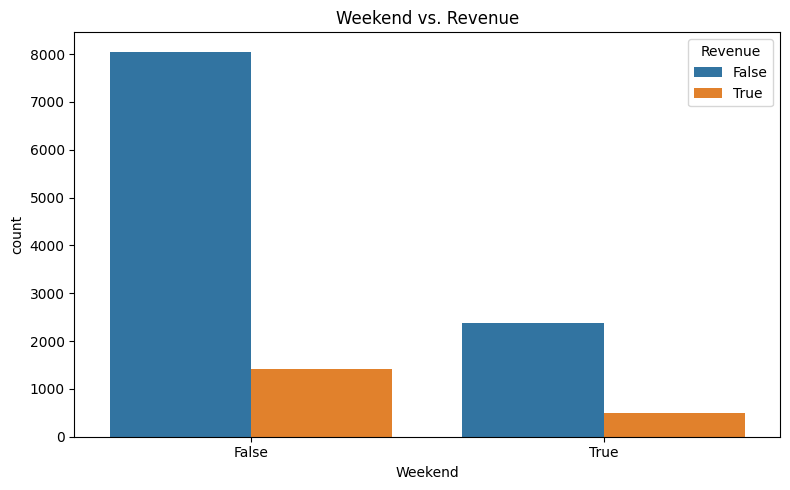

In [29]:
# Revenue vs. 'Weekend'
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Weekend', hue='Revenue')
plt.title('Weekend vs. Revenue')
plt.tight_layout()
plt.show()

### Observation

- Revenue generation is higher during weekdays compared to weekends, as indicated by a larger proportion of revenue (`True`) during non-weekend sessions.


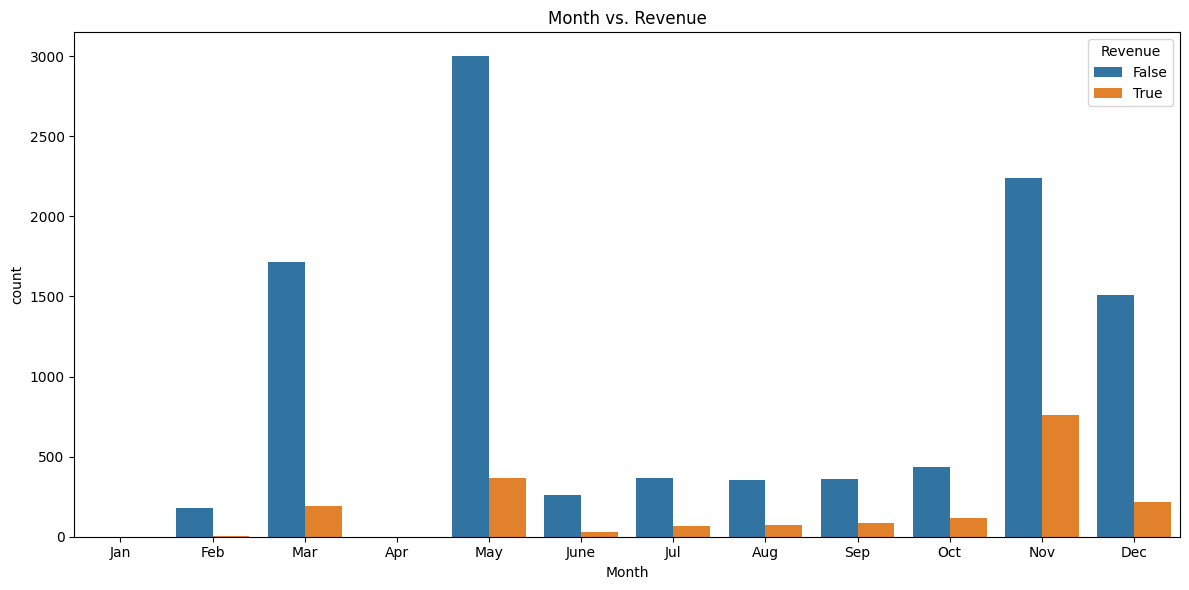

In [30]:
# Revenue vs. 'Month'
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Month', hue='Revenue', order=months_order)
plt.title('Month vs. Revenue')
plt.tight_layout()
plt.show()


### Observation

- Revenue generation is highest in **May** and **November**, indicating peak shopping activity during these months.



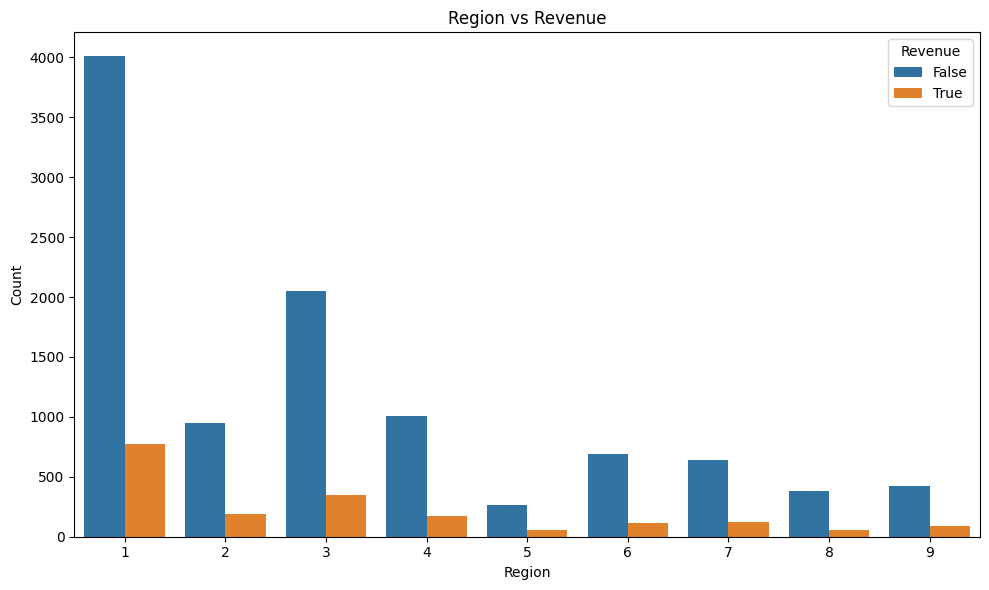

In [31]:
# Region vs Revenue
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Region', hue='Revenue')
plt.title('Region vs Revenue')
plt.xlabel('Region')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Observation

- Region **1** generates the highest revenue, while Regions **2** and **3** show potential for improved conversions.


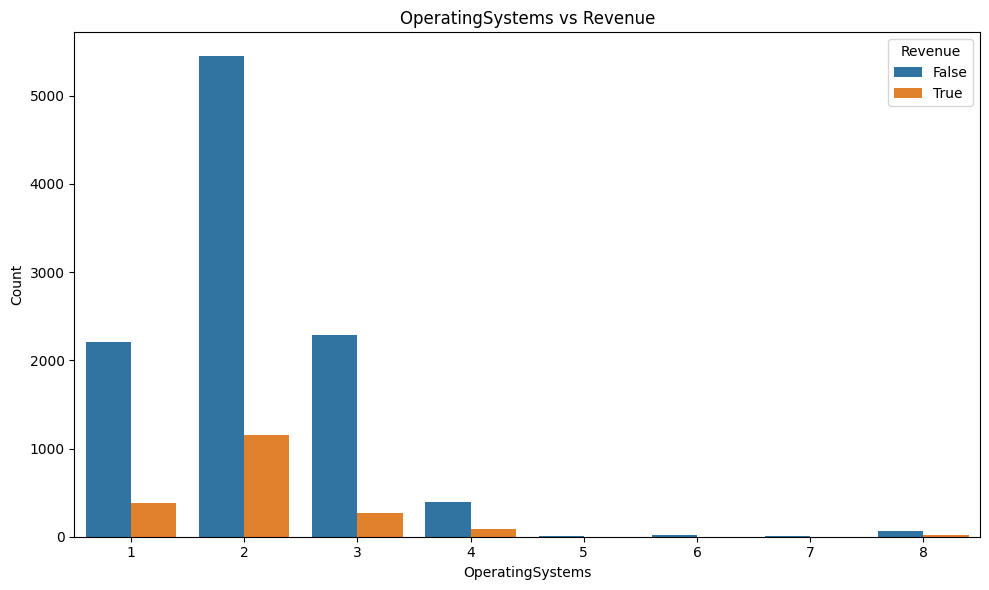

In [32]:
# OperatingSystems vs Revenue
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='OperatingSystems', hue='Revenue')
plt.title('OperatingSystems vs Revenue')
plt.xlabel('OperatingSystems')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


### Observation

- Operating System **2** generates the most revenue, while other systems show relatively lower contributions.


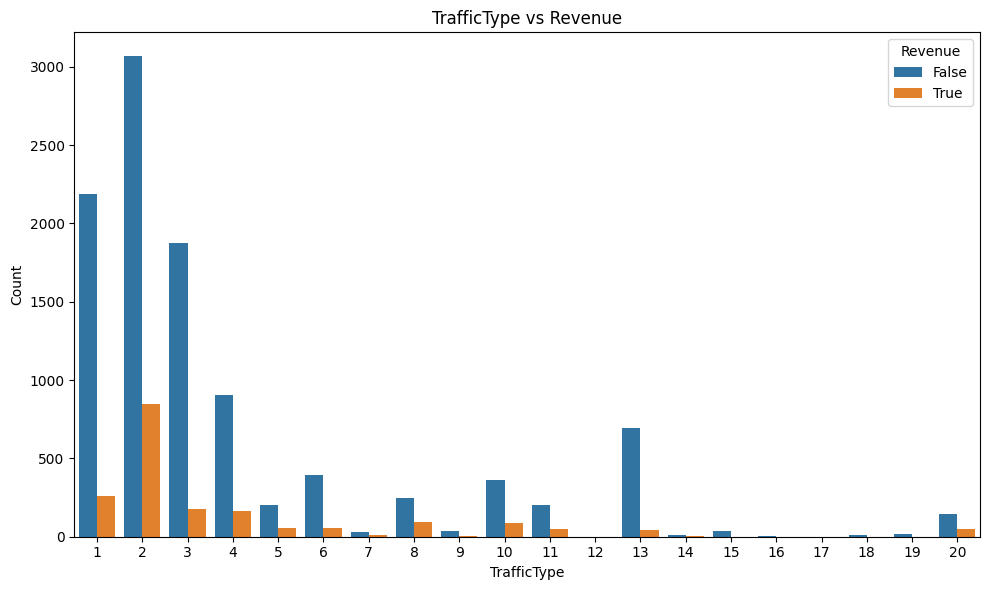

In [33]:
# TrafficType vs Revenue
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='TrafficType', hue='Revenue')
plt.title('TrafficType vs Revenue')
plt.xlabel('TrafficType')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


### Observation

- Traffic Type **2** generates the highest revenue, followed by Types **1** and **3**, while other types contribute minimally.


### 2.4 BounceRates vs ExitRates 

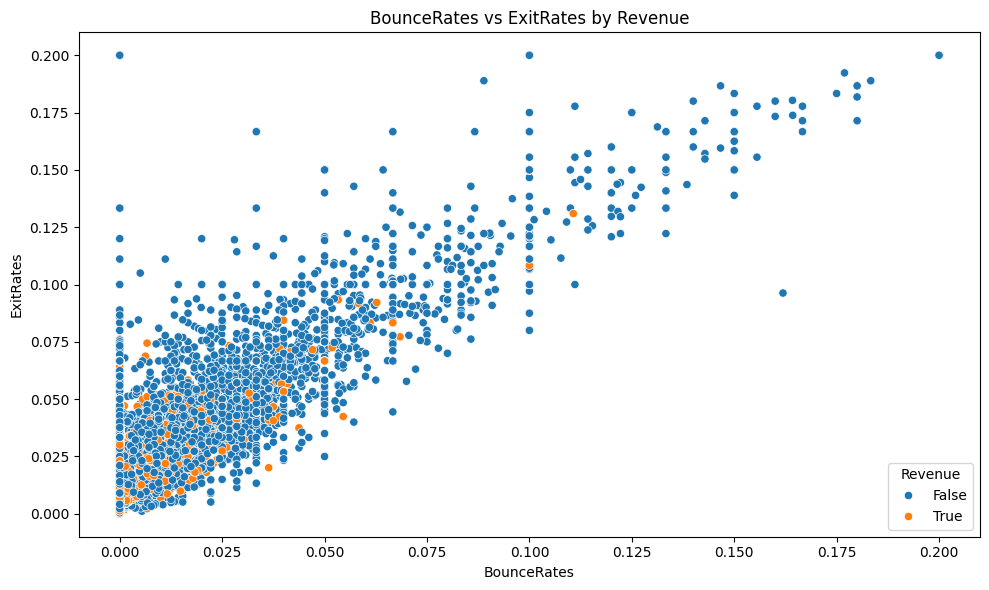

In [34]:
# Scatter plot for BounceRates vs ExitRates
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='BounceRates', y='ExitRates', hue='Revenue')
plt.title('BounceRates vs ExitRates by Revenue')
plt.xlabel('BounceRates')
plt.ylabel('ExitRates')
plt.tight_layout()
plt.show()


### Observation

- Higher bounce rates and exit rates are predominantly associated with non-revenue sessions (`False`), while revenue sessions (`True`) generally have lower values for both metrics.


### 3.4 ProductRelated vs ProductRelated_Duration

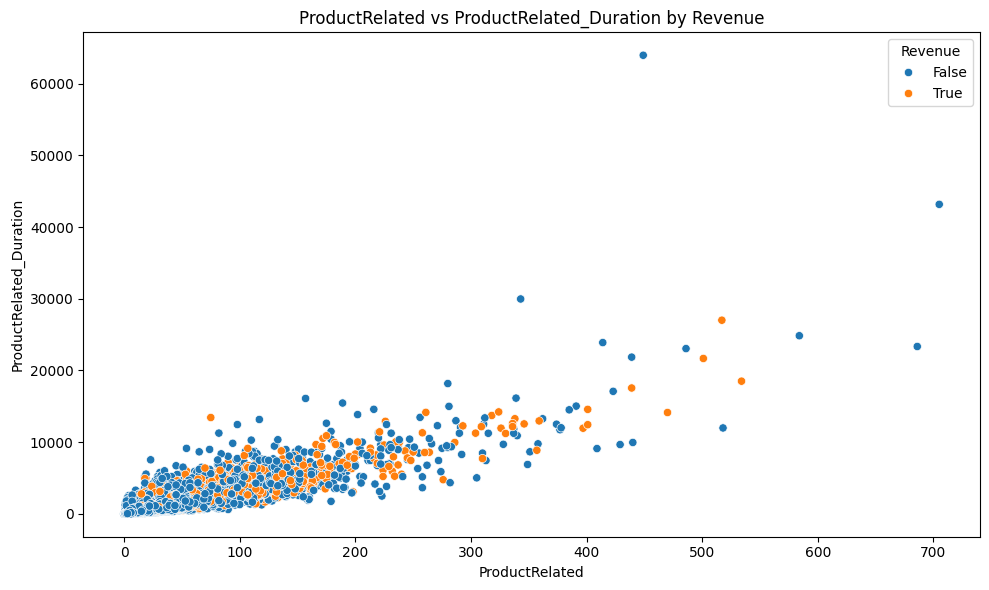

In [35]:
# Scatter plot for ProductRelated vs ProductRelated_Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='ProductRelated', y='ProductRelated_Duration', hue='Revenue')
plt.title('ProductRelated vs ProductRelated_Duration by Revenue')
plt.xlabel('ProductRelated')
plt.ylabel('ProductRelated_Duration')
plt.tight_layout()
plt.show()


### Observation

- Higher values of `ProductRelated` and `ProductRelated_Duration` are strongly associated with revenue sessions (`True`), indicating that longer engagement with product-related pages leads to higher conversions.


### 3.5 PageValues vs ProductRelated_Duration

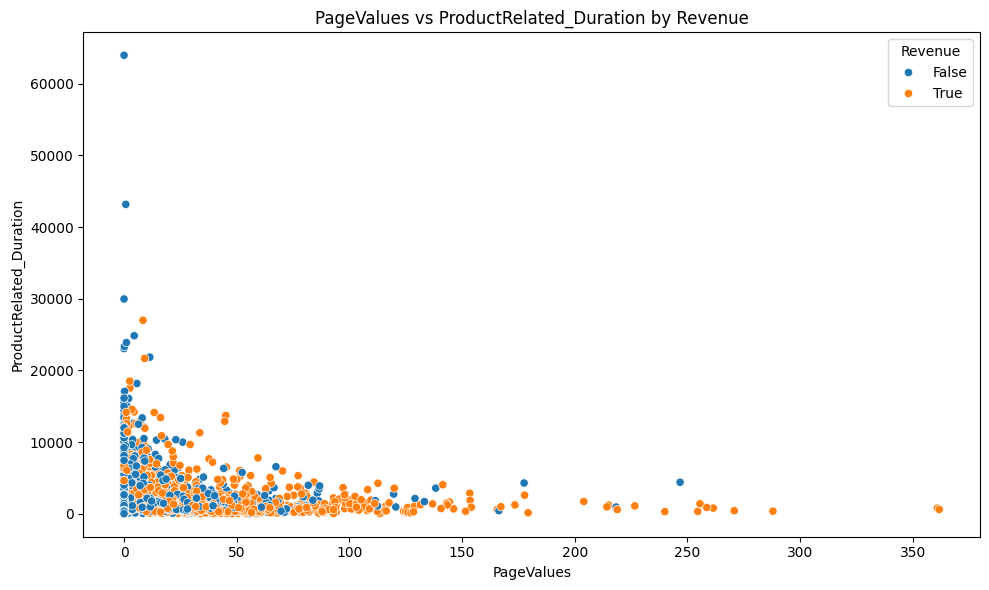

In [36]:
# Scatter plot for PageValues vs ProductRelated_Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='PageValues', y='ProductRelated_Duration', hue='Revenue')
plt.title('PageValues vs ProductRelated_Duration by Revenue')
plt.xlabel('PageValues')
plt.ylabel('ProductRelated_Duration')
plt.tight_layout()
plt.show()


### Observation

- Higher `PageValues` and `ProductRelated_Duration` are strongly associated with revenue sessions (`True`), showing that valuable pages and prolonged engagement drive conversions.



### 3.6 Month vs BounceRates

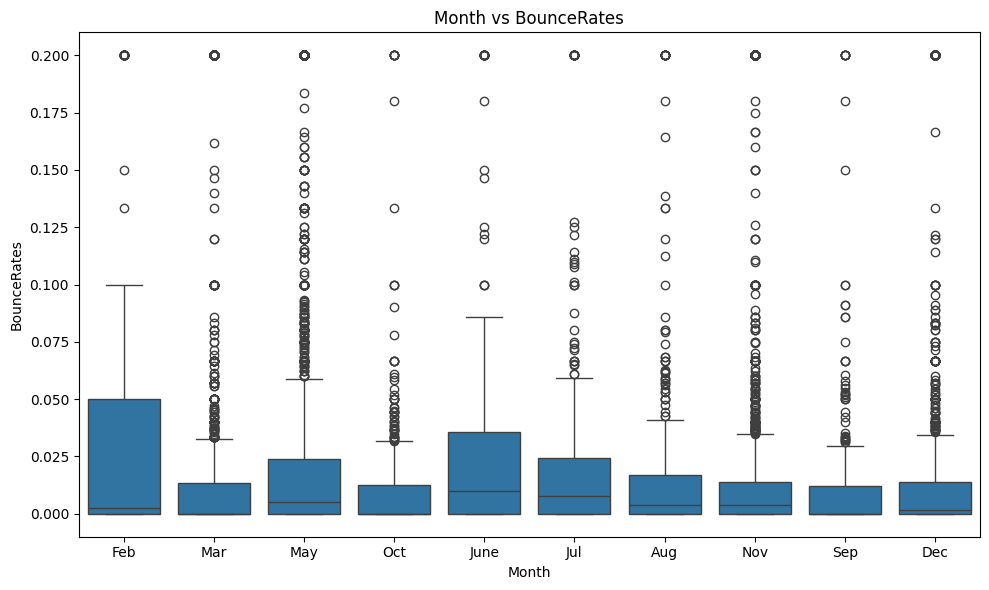

In [37]:
# Boxplot for Month vs BounceRates
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Month', y='BounceRates')
plt.title('Month vs BounceRates')
plt.xlabel('Month')
plt.ylabel('BounceRates')
plt.tight_layout()
plt.show()


### Observation

- **February** shows the highest bounce rates, while other months, particularly **March**, **May**, and **November**, have relatively lower bounce rates.


### 3.7 VisitorType vs PageValues

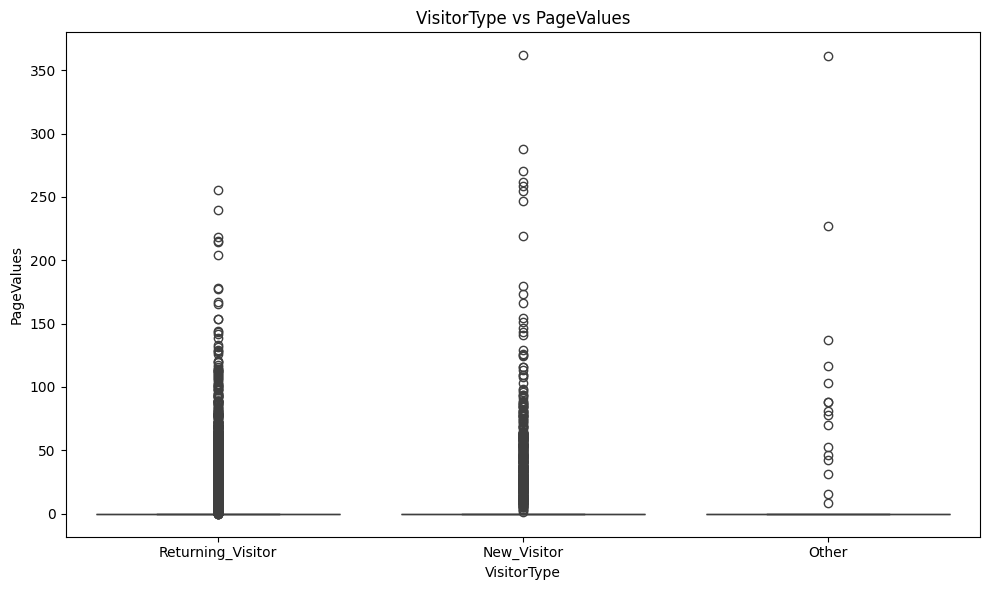

In [38]:
# Boxplot for VisitorType vs PageValues
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='VisitorType', y='PageValues')
plt.title('VisitorType vs PageValues')
plt.xlabel('VisitorType')
plt.ylabel('PageValues')
plt.tight_layout()
plt.show()


### Observation

- **Returning visitors** generally have higher page values compared to **new visitors** and **other visitor types**, indicating greater engagement with valuable content.


### 3.8 Weekend vs PageValues

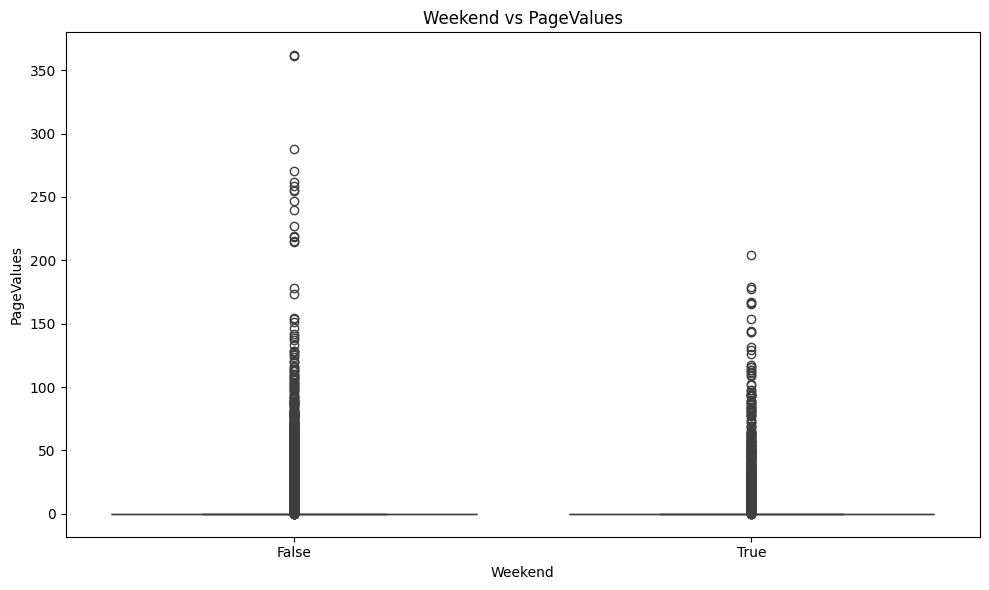

In [39]:
# Boxplot for Weekend vs PageValues
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Weekend', y='PageValues')
plt.title('Weekend vs PageValues')
plt.xlabel('Weekend')
plt.ylabel('PageValues')
plt.tight_layout()
plt.show()


### Observation

- Page values are similar between weekend and non-weekend sessions, with slightly higher values observed during non-weekend sessions.


## 2.4. Multivariate Analysis
This section combines multiple variables to understand their combined impact on revenue and other outcomes.


### 2.4.1. Pairplot for Numerical Features by Revenue

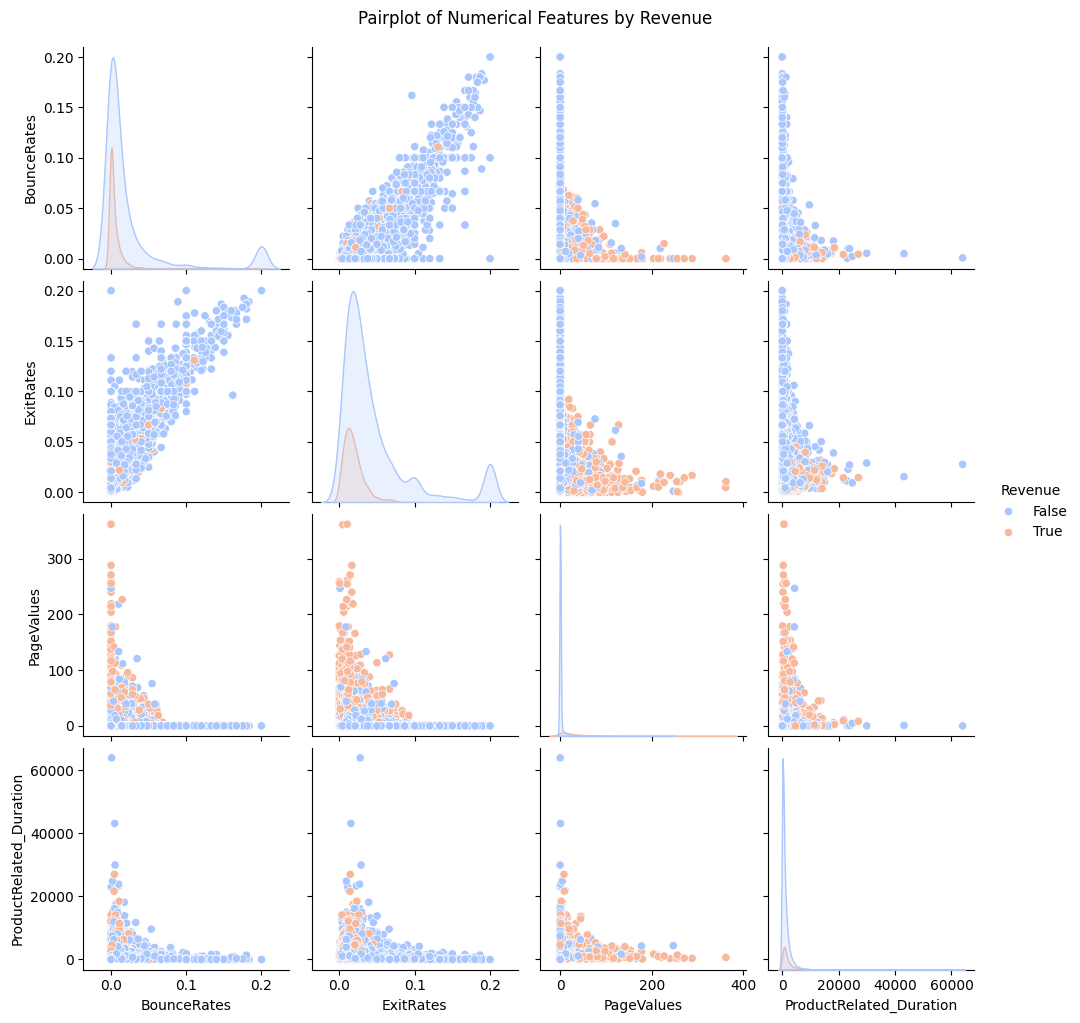

In [40]:
# Pairplot for numerical variables colored by 'Revenue'
sns.pairplot(data, vars=['BounceRates', 'ExitRates', 'PageValues', 'ProductRelated_Duration'], hue='Revenue', palette='coolwarm')
plt.suptitle('Pairplot of Numerical Features by Revenue', y=1.02)
plt.show()


#### Observations from Pairplot

1. **BounceRates & ExitRates**: High values correlate with no revenue, while low values lead to conversions.
2. **PageValues**: High page values strongly associate with revenue generation.
3. **ProductRelated_Duration**: Longer durations on product-related pages increase revenue likelihood.
4. **Engagement**: Sessions with lower bounce rates and higher product-related durations drive revenue.



### 2.4.2. Heatmap of Correlations Including Revenue


In [41]:
# Drop non-numeric columns that aren't needed
data_numeric = data.drop(['Month', 'VisitorType', 'Month_Date'], axis=1)

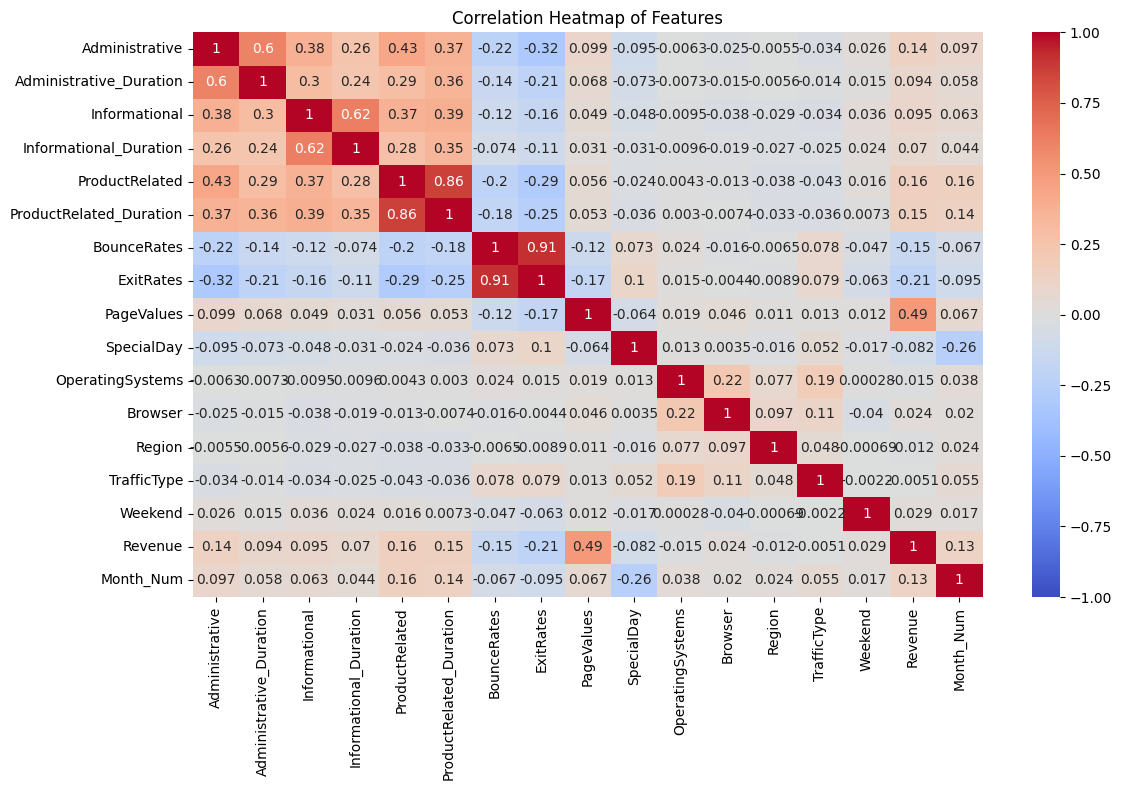

In [42]:
# Correlation heatmap including 'Revenue'
plt.figure(figsize=(12, 8))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()


#### Observations from Correlation Heatmap

- Features like **PageValues**, **ProductRelated**, and **ProductRelated_Duration** show a positive correlation with revenue, indicating that higher engagement and valuable content contribute to conversions.
- **BounceRates** and **ExitRates** have a negative correlation with revenue, suggesting that reducing these rates can improve revenue generation.
- Other features, such as **SpecialDay**, **Weekend**, and **Month_Num**, have minimal correlation with revenue, implying a weaker direct impact on revenue generation.


## 2.5. Time-Series Analysis
This section explores monthly trends in revenue and other key metrics using time-series analysis.


### 2.5.1. Time-Series Analysis of Monthly Revenue Trends

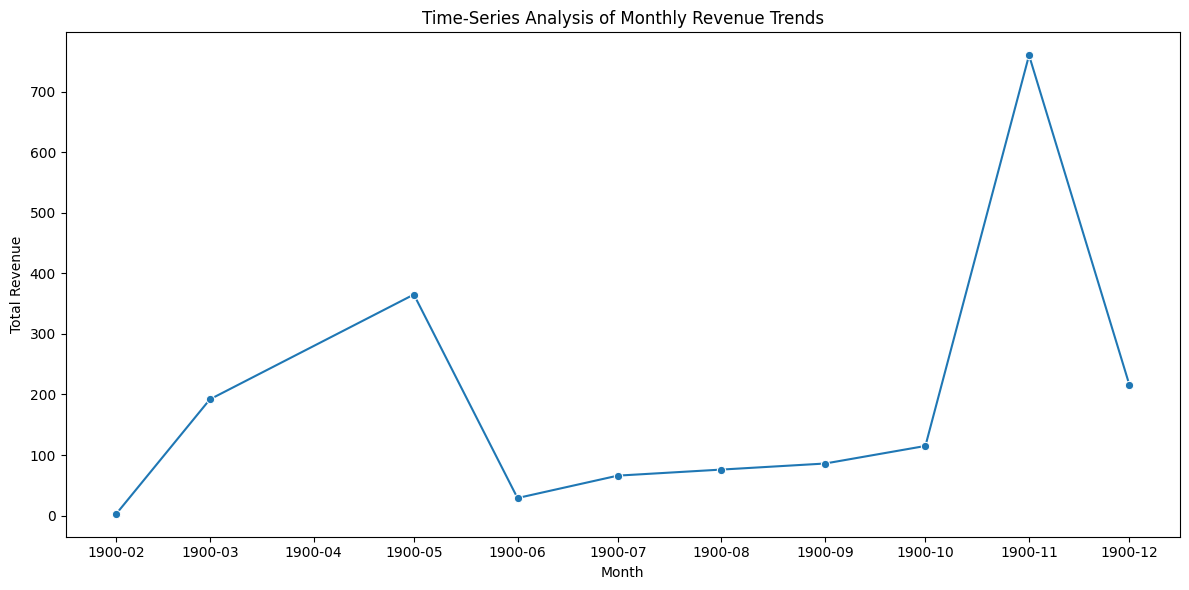

In [43]:
# Aggregating revenue by month
monthly_revenue_trend = data.groupby('Month_Date')['Revenue'].sum().reset_index()

# Sorting by month to ensure correct time-series order
monthly_revenue_trend = monthly_revenue_trend.sort_values('Month_Date')

# Plotting time-series trends in revenue
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue_trend, x='Month_Date', y='Revenue', marker='o')
plt.title('Time-Series Analysis of Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


### Observations
- **Revenue peaks** in November, indicating strong seasonality, likely due to shopping events.
- **Revenue dips** are noted in February and June, possibly representing off-peak months.


### 2.5.2. Time-Series Analysis of Monthly Bounce Rates

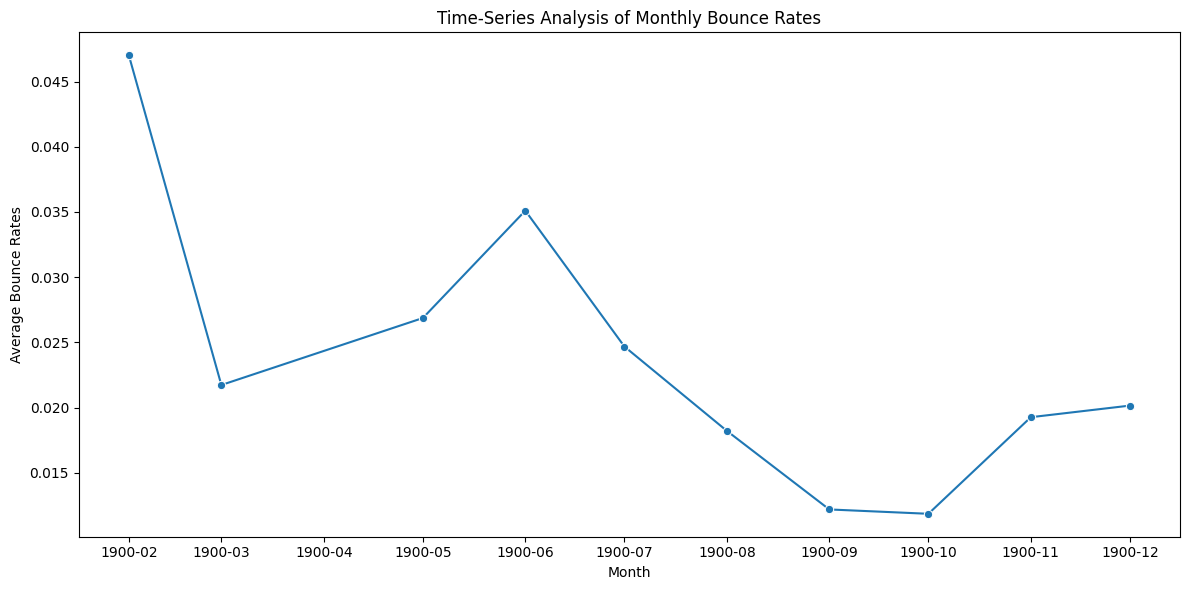

In [44]:
# Aggregating average bounce rates by month
monthly_bounce_trend = data.groupby('Month_Date')['BounceRates'].mean().reset_index()

# Plotting time-series trends in bounce rates
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_bounce_trend, x='Month_Date', y='BounceRates', marker='o')
plt.title('Time-Series Analysis of Monthly Bounce Rates')
plt.xlabel('Month')
plt.ylabel('Average Bounce Rates')
plt.tight_layout()
plt.show()


### Observations
- **Higher bounce rates** are observed in February, indicating user disengagement.
- Bounce rates are generally **lower in September and October**, suggesting better user engagement during these months.


### 2.5.3. Time-Series Analysis of Monthly Exit Rates

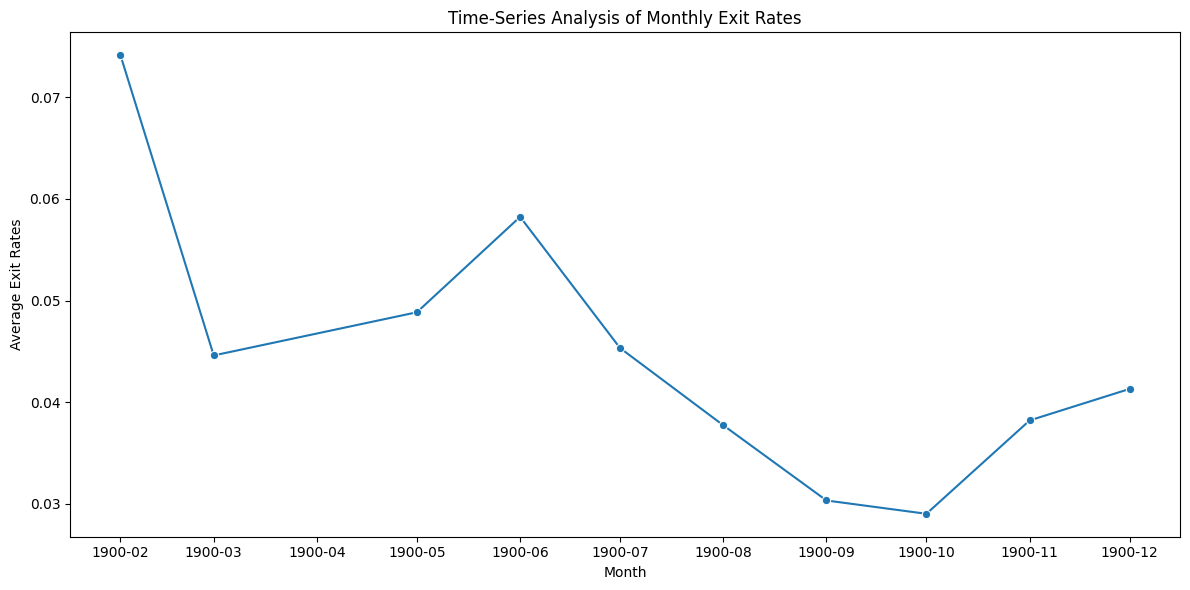

In [45]:
# Aggregating average exit rates by month
monthly_exit_trend = data.groupby('Month_Date')['ExitRates'].mean().reset_index()

# Plotting time-series trends in exit rates
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_exit_trend, x='Month_Date', y='ExitRates', marker='o')
plt.title('Time-Series Analysis of Monthly Exit Rates')
plt.xlabel('Month')
plt.ylabel('Average Exit Rates')
plt.tight_layout()
plt.show()


### Observations
- **Higher exit rates** are recorded in February and June, aligning with the dips in revenue during these months.
- **Lower exit rates** are noted in September and October, indicating higher user retention.


## 3. Preprocessing with Label Encoding and Standardization

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay


### 3.1 Label Encoding

In [47]:
# Encoding categorical variables
label_encoders = {}
categorical_columns = ['Month', 'VisitorType', 'Weekend']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Displaying the first few rows to verify encoding
data.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Month_Num,Month_Date
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,False,2,1900-02-01
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,False,2,1900-02-01
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,False,2,1900-02-01
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,False,2,1900-02-01
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,False,2,1900-02-01


### 3.2 Standardization of Numerical Features

In [48]:
# Numerical features to standardize
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational',
                      'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                      'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser',
                     'Region', 'TrafficType']

# Standardizing numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Displaying the first few rows to verify standardization
data.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Month_Num,Month_Date
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2,-1.233426,-0.790293,-0.894178,-0.762629,2,0,False,2,1900-02-01
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,2,-0.136078,-0.207952,-0.894178,-0.514182,2,0,False,2,1900-02-01
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2,2.058618,-0.790293,2.437081,-0.265735,2,0,False,2,1900-02-01
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,2,0.961270,-0.207952,-0.477771,-0.017289,2,0,False,2,1900-02-01
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,2,0.961270,0.374389,-0.894178,-0.017289,2,1,False,2,1900-02-01


In [49]:
# Drop redundant columns if they exist
if 'Month_Num' in data.columns:
    data = data.drop('Month_Num', axis=1)

if 'Month_Date' in data.columns:
    data = data.drop('Month_Date', axis=1)

# Proceed with the dataset
data.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2,-1.233426,-0.790293,-0.894178,-0.762629,2,0,False
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,2,-0.136078,-0.207952,-0.894178,-0.514182,2,0,False
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2,2.058618,-0.790293,2.437081,-0.265735,2,0,False
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,2,0.961270,-0.207952,-0.477771,-0.017289,2,0,False
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,2,0.961270,0.374389,-0.894178,-0.017289,2,1,False


### 3.3 Splitting Data into Features and Target

In [50]:
# Defining features (X) and target (y)
X = data.drop('Revenue', axis=1)
y = data['Revenue']

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Checking the shape of the splits
print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")


Training Set: (8631, 17), Test Set: (3699, 17)


In [51]:
# Apply SMOTE to balance the dataset (oversample the minority class)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## 4. Model Training and Evaluation

### 4.1 Logistic Regression

In [52]:
# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000, random_state=42)

In [53]:
# Predictions
y_pred_lr = lr_model.predict(X_test)

In [54]:
# Evaluation
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Performance:
Accuracy: 0.8665
Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.90      0.92      3127
        True       0.55      0.71      0.62       572

    accuracy                           0.87      3699
   macro avg       0.75      0.80      0.77      3699
weighted avg       0.88      0.87      0.87      3699



#### Confusion Matrix

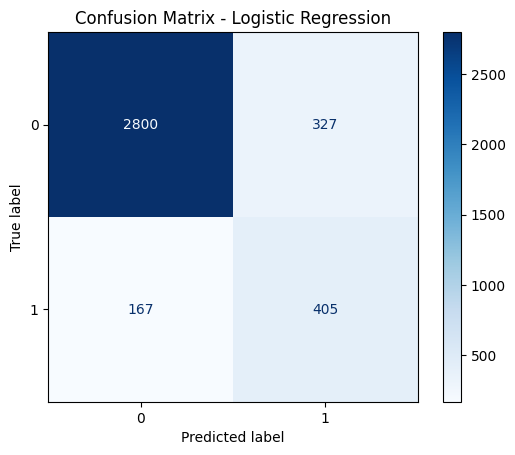

In [55]:
# Plot Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

#### Feature Coefficients plot

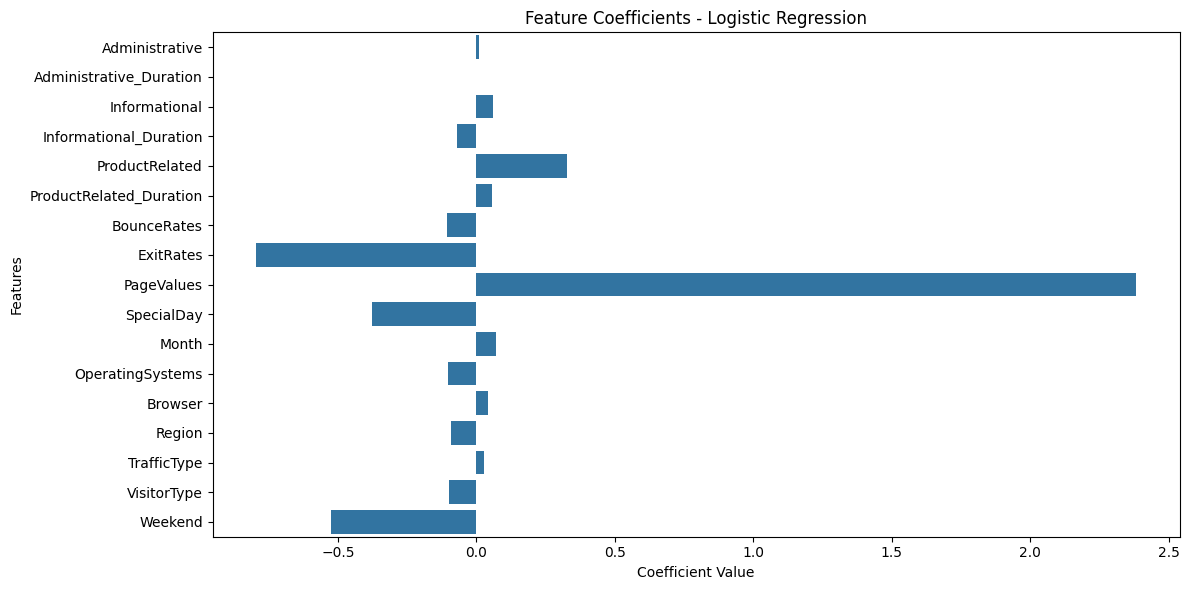

In [56]:
# Feature Coefficients for Logistic Regression
coefficients_lr = lr_model.coef_[0]
plt.figure(figsize=(12, 6))
sns.barplot(x=coefficients_lr, y=X.columns)
plt.title("Feature Coefficients - Logistic Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


### 4.2 Random Forest Classifier

In [57]:
# Training a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [58]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

In [59]:
# Evaluating the model
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Performance:
Accuracy: 0.8838
Confusion Matrix:
 [[2867  260]
 [ 170  402]]
Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.92      0.93      3127
        True       0.61      0.70      0.65       572

    accuracy                           0.88      3699
   macro avg       0.78      0.81      0.79      3699
weighted avg       0.89      0.88      0.89      3699



#### Confusion Matrix

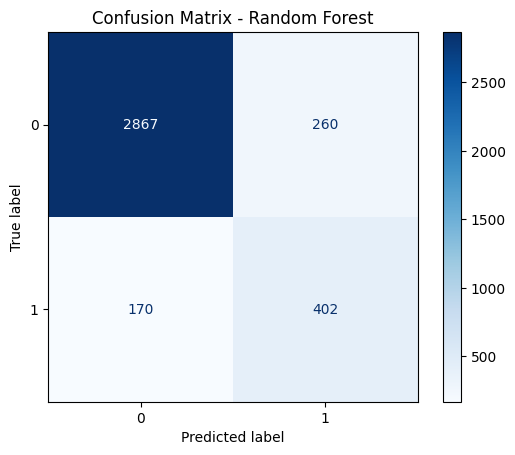

In [60]:
# Plot Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()

#### Feature importance plot

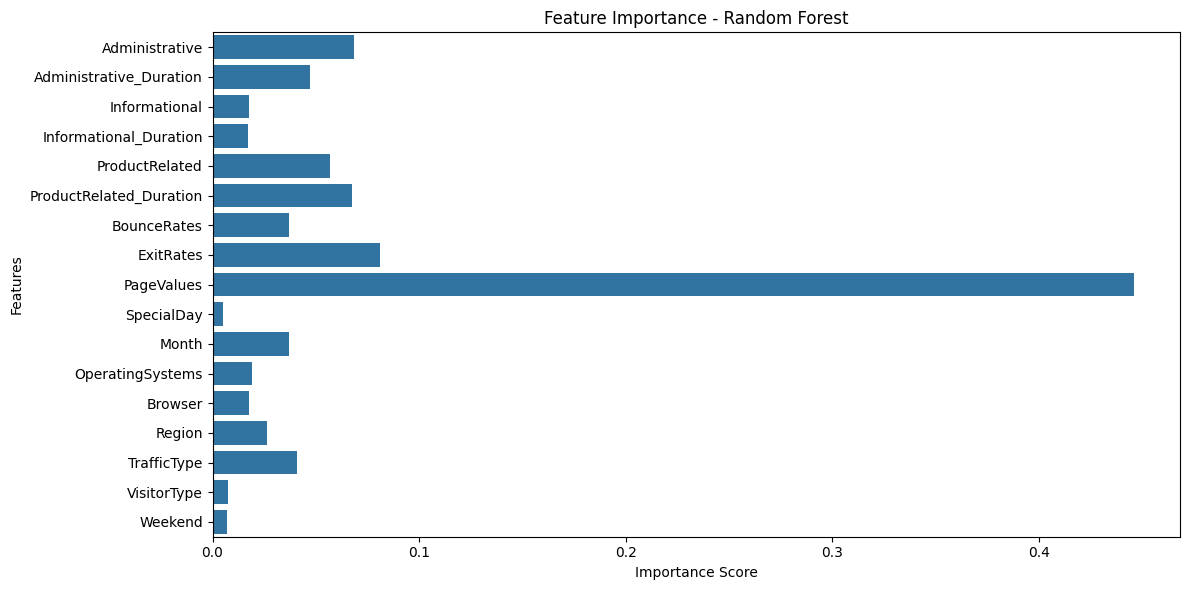

In [61]:
# Feature importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns

# Plotting feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


### 4.3 Gradient Boosting Classifier

In [62]:
# Train Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_gb = gb_model.predict(X_test)

In [63]:
# Evaluation
print("Gradient Boosting Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_gb))



Gradient Boosting Performance:
Accuracy: 0.8821
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.91      0.93      3127
        True       0.60      0.72      0.66       572

    accuracy                           0.88      3699
   macro avg       0.77      0.82      0.79      3699
weighted avg       0.89      0.88      0.89      3699



#### Confusion Matrix

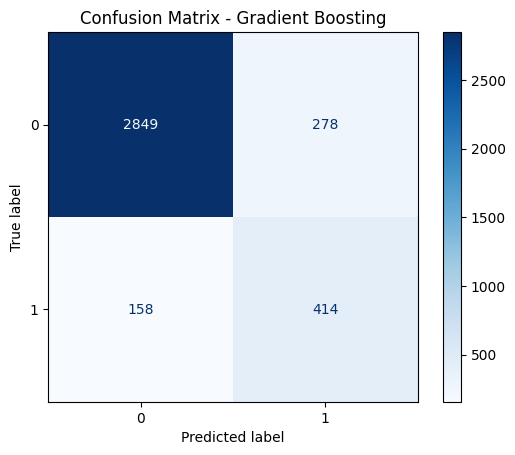

In [64]:
# Plot Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb)
disp_gb.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


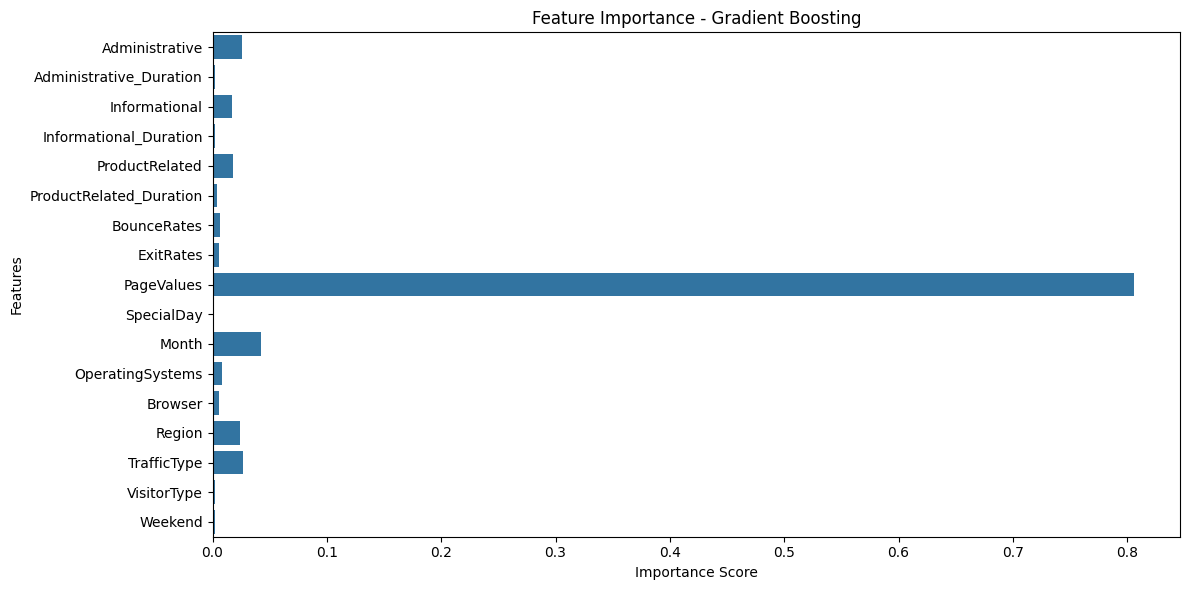

In [65]:
# Plot Feature Importance
importances_gb = gb_model.feature_importances_
plt.figure(figsize=(12, 6))
sns.barplot(x=importances_gb, y=X.columns)
plt.title("Feature Importance - Gradient Boosting")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

### 4.4 Support Vector Machine (SVM)

In [66]:
# Train SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_smote, y_train_smote)



SVC(kernel='linear', random_state=42)

In [67]:
# Predictions
y_pred_svm = svm_model.predict(X_test)

In [68]:
# Evaluation
print("SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Performance:
Accuracy: 0.8662
Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.90      0.92      3127
        True       0.55      0.70      0.62       572

    accuracy                           0.87      3699
   macro avg       0.75      0.80      0.77      3699
weighted avg       0.88      0.87      0.87      3699



#### Confusion Matrix

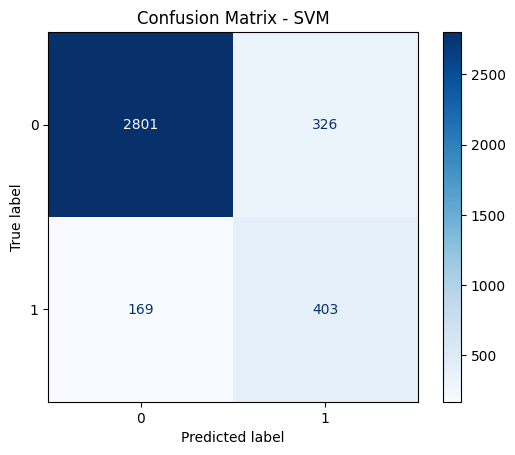

In [69]:
# Plot Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - SVM")
plt.show()

#### Feature Importance for Linear SVM

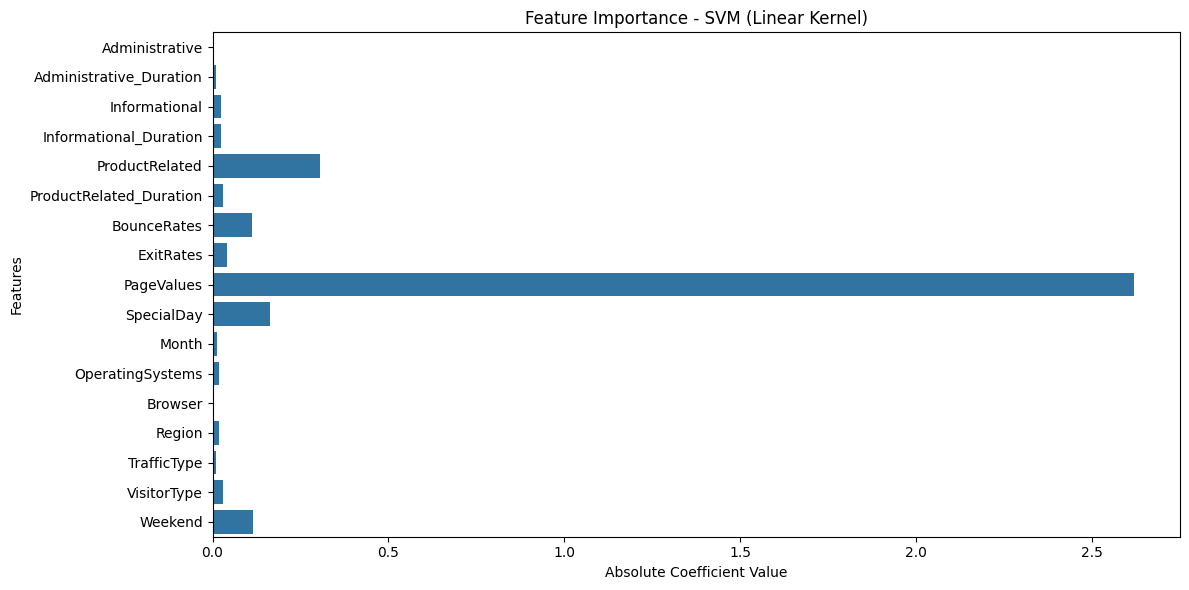

In [70]:
# Extracting feature coefficients for SVM (Linear Kernel)
coefficients_svm = np.abs(svm_model.coef_[0])

# Plotting feature importance for SVM
plt.figure(figsize=(12, 6))
sns.barplot(x=coefficients_svm, y=X.columns)
plt.title("Feature Importance - SVM (Linear Kernel)")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


### 5. Performance Comparison Across Models

In [71]:
# Comparing model performance
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr),
                 accuracy_score(y_test, y_pred_rf),
                 accuracy_score(y_test, y_pred_gb),
                 accuracy_score(y_test, y_pred_svm)]
}

results_df = pd.DataFrame(results)
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)

# Displaying the performance comparison
results_df


,Model,Accuracy
1,Random Forest,0.883752
2,Gradient Boosting,0.882130
0,Logistic Regression,0.866450
3,SVM,0.866180
